**STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM**

In [34]:
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [35]:
key=""

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv('AAPL.csv')

In [38]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [39]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8037,23-11-2021,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
8038,24-11-2021,160.750000,162.139999,159.639999,161.940002,161.940002,69463600
8039,26-11-2021,159.570007,160.449997,156.360001,156.809998,156.809998,76959800
8040,29-11-2021,159.369995,161.190002,158.789993,160.240005,160.240005,88748200
8041,30-11-2021,159.990005,165.520004,159.919998,165.300003,165.300003,174048100


In [40]:
df1=df.reset_index()['Close']

In [41]:
df1

0         0.332589
1         0.334821
2         0.335938
3         0.337054
4         0.339286
           ...    
8037    161.410004
8038    161.940002
8039    156.809998
8040    160.240005
8041    165.300003
Name: Close, Length: 8042, dtype: float64

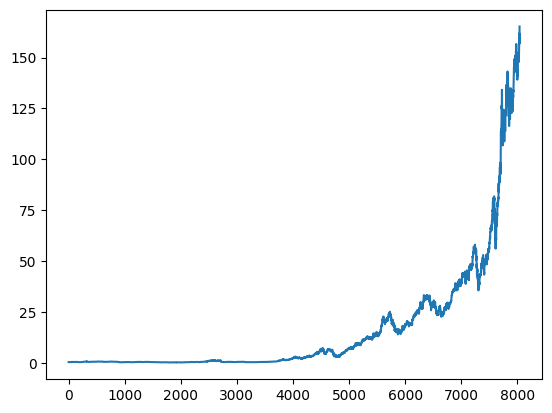

In [42]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
print(df1)


[[0.00131414]
 [0.00132765]
 [0.00133442]
 ...
 [0.94860289]
 [0.9693676 ]
 [1.        ]]


In [45]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(5227, 2815)

In [47]:
train_data

array([[0.00131414],
       [0.00132765],
       [0.00133442],
       ...,
       [0.06151469],
       [0.06176765],
       [0.06250276]])

In [48]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [49]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
print(X_train.shape), print(y_train.shape)

(5126, 100)
(5126,)


(None, None)

In [51]:
print(X_test.shape), print(ytest.shape)

(2714, 100)
(2714,)


(None, None)

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
81/81 [==============================] - 44s 220ms/step - loss: 2.6651e-05 - val_loss: 0.0027
Epoch 2/100
81/81 [==============================] - 15s 183ms/step - loss: 1.6920e-06 - val_loss: 0.0032
Epoch 3/100
81/81 [==============================] - 15s 184ms/step - loss: 1.7294e-06 - val_loss: 0.0022
Epoch 4/100
81/81 [==============================] - 15s 185ms/step - loss: 2.8411e-06 - val_loss: 0.0019
Epoch 5/100
81/81 [==============================] - 15s 184ms/step - loss: 1.7585e-06 - val_loss: 0.0019
Epoch 6/100
81/81 [==============================] - 15s 185ms/step - loss: 1.4943e-06 - val_loss: 8.6301e-04
Epoch 7/100
81/81 [==============================] - 15s 191ms/step - loss: 2.0387e-06 - val_loss: 0.0017
Epoch 8/100
81/81 [==============================] - 16s 191ms/step - loss: 1.4715e-06 - val_loss: 0.0012
Epoch 9/100
81/81 [==============================] - 15s 185ms/step - loss: 1.1522e-06 - val_loss: 0.0017
Epoch 10/100
81/81 [======================

In [58]:
import tensorflow as tf

In [59]:
tf.__version__

'2.15.0'

In [60]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

85/85 [==============================] - 4s 44ms/step


In [61]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.7180452435618245

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

53.04824517868747

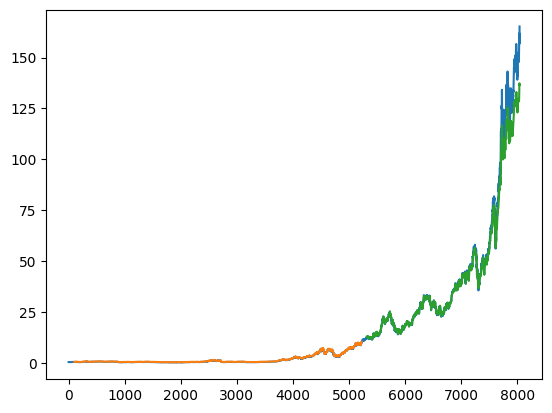

In [64]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [65]:
len(test_data)

2815

In [66]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 2474)

In [67]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [68]:
temp_input

[0.09770150333121469,
 0.09868741308581694,
 0.09961493963507105,
 0.10066572230843222,
 0.10236295792661888,
 0.1059282321239724,
 0.10598228683576769,
 0.1079670857717937,
 0.10945026981649426,
 0.10690118061326459,
 0.10788275582047682,
 0.10786330484175602,
 0.11061563951918245,
 0.11022429527130542,
 0.11094858845403706,
 0.1122501634384681,
 0.11297446872887398,
 0.11506088132124268,
 0.11658081821120128,
 0.11701972140362572,
 0.11717324065958007,
 0.11457441918427085,
 0.11394740511049191,
 0.11404037994124024,
 0.11648353910224864,
 0.11717107943972221,
 0.1186477858786863,
 0.1221287361785601,
 0.12677289496126423,
 0.12590373345584685,
 0.12590589467570473,
 0.12926361306682002,
 0.13031439574018117,
 0.12956630492366444,
 0.12888309307974374,
 0.1281717611623222,
 0.13053491281172946,
 0.1321564875733793,
 0.13283538303142142,
 0.13115759839195557,
 0.12892849080443328,
 0.13305375099078612,
 0.13536501520209313,
 0.13428180817702678,
 0.13630769450570088,
 0.13685901745375